In [352]:
import pandas as pd
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt

In [353]:
df1 = pd.read_csv("b30hz10.txt", sep="\t", header=None) # не нормативная работа подшипника
df1.rename(columns={0: "sensor1", 1: "sensor2", 2: "sensor3", 3: "sensor4"}, inplace=True)
df1.drop(columns=[4], inplace=True)
df1.head()

,sensor1,sensor2,sensor3,sensor4
0,1.260410,-1.35726,-1.916330,1.84570
1,-0.126204,-2.27283,0.536155,1.53092
2,-0.903164,-1.04204,-0.741337,1.65011
3,-1.693560,2.79295,-0.066998,2.01735
4,-3.556980,2.11411,0.225473,2.32982


In [354]:
df2 = pd.read_csv("h30hz10.txt", sep="\t", header=None) # нормативная работа подшипника
df2.rename(columns={0: "sensor1", 1: "sensor2", 2: "sensor3", 3: "sensor4"}, inplace=True)
df2.drop(columns=[4], inplace=True)
df2.head()

,sensor1,sensor2,sensor3,sensor4
0,-0.169381,-1.282080,3.302820,-1.556990
1,3.945820,-0.220907,-0.003485,-0.174652
2,0.888728,0.694251,-0.035491,-0.470260
3,-2.332820,-1.578870,1.306010,-1.295540
4,1.755510,2.084890,0.348722,0.502751


In [355]:
start_ind = 300
end_ind = 600

df1 = df1[start_ind:end_ind]
df2 = df2[start_ind:end_ind]

In [356]:
fig = px.line(df1)
fig.update_layout(title="Не нормативная работа подшипника",
                  xaxis_title="Индекс",
                  yaxis_title="Сигнал")
fig.show()

In [357]:
fig = px.line(df2)
fig.update_layout(title="Нормативная работа подшипника",
                  xaxis_title="Индекс",
                  yaxis_title="Сигнал")
fig.show()

Корреляция Пирсона

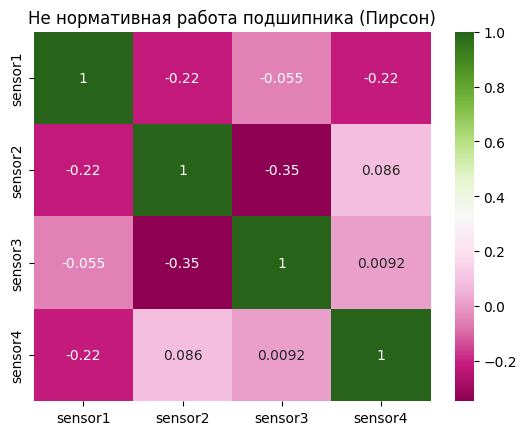

In [358]:
corr = df1.corr(method="pearson")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Не нормативная работа подшипника (Пирсон)")
plt.show()

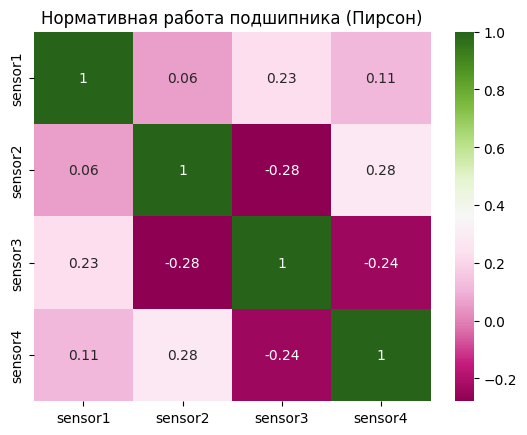

In [359]:
corr = df2.corr(method="pearson")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Нормативная работа подшипника (Пирсон)")
plt.show()

Корреляция Спирмена

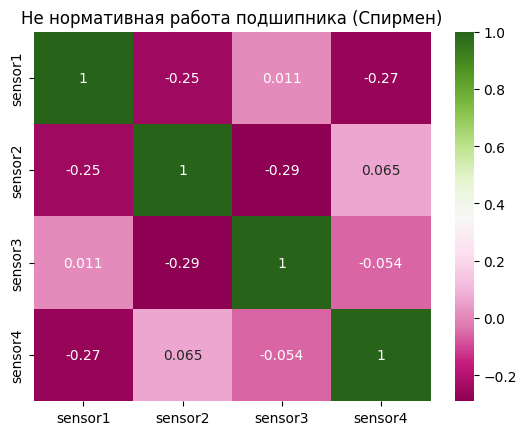

In [360]:
corr = df1.corr(method="spearman")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Не нормативная работа подшипника (Спирмен)")
plt.show()

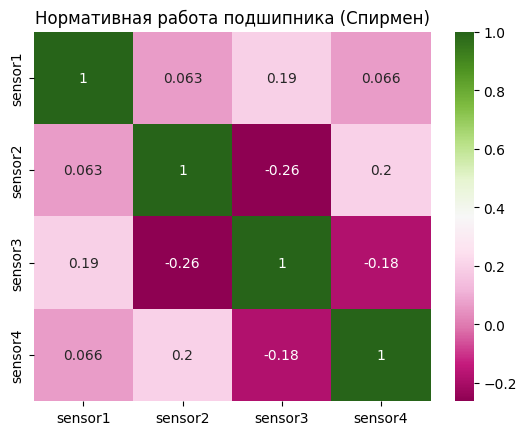

In [361]:
corr = df2.corr(method="spearman")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Нормативная работа подшипника (Спирмен)")
plt.show()

Корреляция Кендала

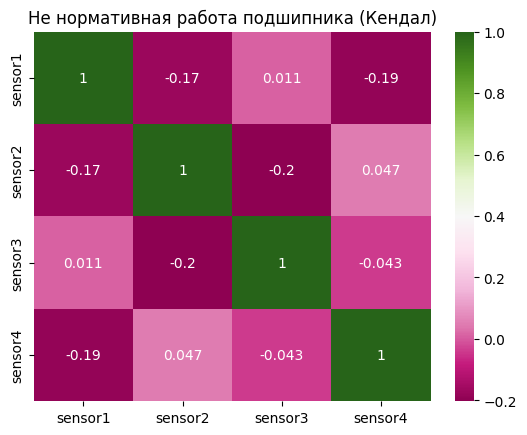

In [362]:
corr = df1.corr(method="kendall")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Не нормативная работа подшипника (Кендал)")
plt.show()

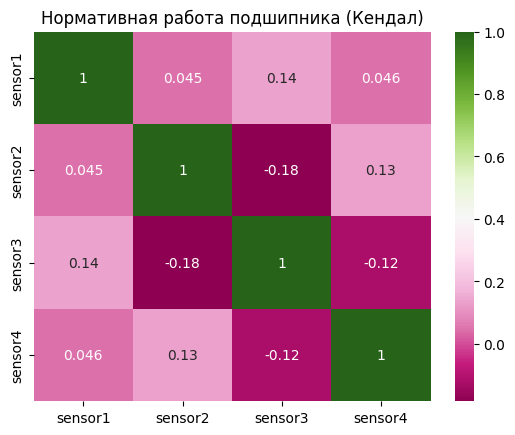

In [363]:
corr = df2.corr(method="kendall")
sb.heatmap(corr, cmap="PiYG", annot=True)
plt.title("Нормативная работа подшипника (Кендал)")
plt.show()

Корреляция для всех сочетаний нормативных и не нормативных сигналов

In [364]:
from scipy import stats
import numpy as np

In [365]:
corr_matrix = np.zeros([4, 4])

Корреляция Пирсона

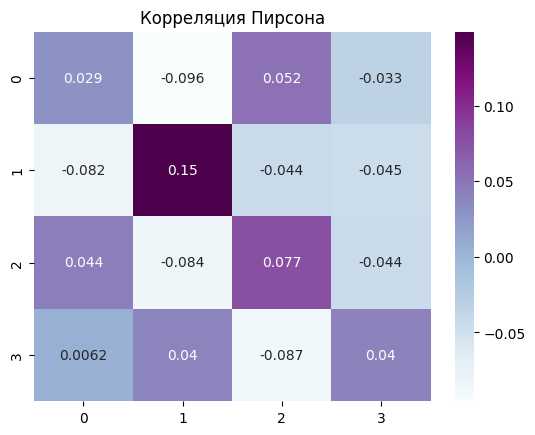

In [366]:
for i in range(1, 5):
  for j in range(1, 5):
    corr_matrix[i - 1, j - 1] = stats.pearsonr(df1["sensor" + str(i)].values, df2["sensor" + str(j)].values).statistic

sb.heatmap(corr_matrix, cmap="BuPu", annot=True)
plt.title("Корреляция Пирсона")
plt.show()

Корреляция Спирмена

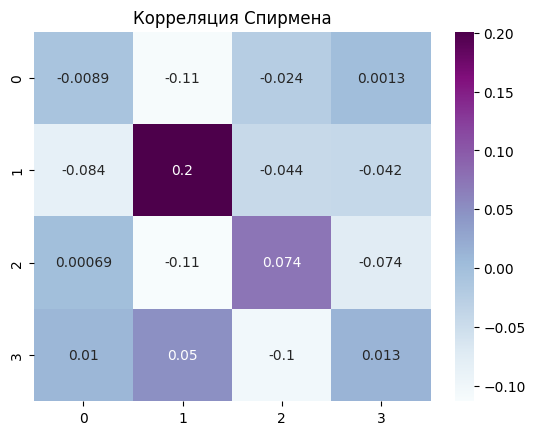

In [367]:
for i in range(1, 5):
  for j in range(1, 5):
    corr_matrix[i - 1, j - 1] = stats.spearmanr(df1["sensor" + str(i)].values, df2["sensor" + str(j)].values).statistic

sb.heatmap(corr_matrix, cmap="BuPu", annot=True)
plt.title("Корреляция Спирмена")
plt.show()

Корреляция Кендала

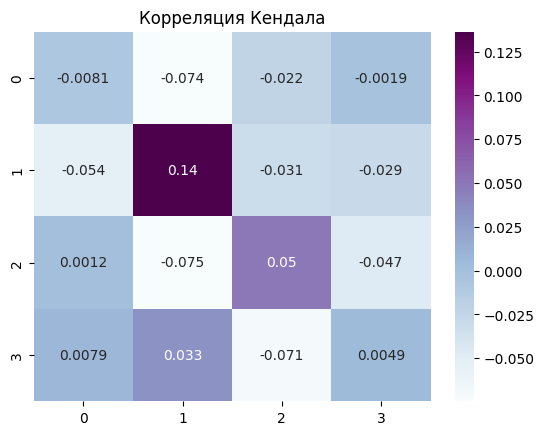

In [368]:
for i in range(1, 5):
  for j in range(1, 5):
    corr_matrix[i - 1, j - 1] = stats.kendalltau(df1["sensor" + str(i)].values, df2["sensor" + str(j)].values).statistic

sb.heatmap(corr_matrix, cmap="BuPu", annot=True)
plt.title("Корреляция Кендала")
plt.show()

DTW

In [369]:
from dtw import *

In [370]:
dtw_matrix = np.zeros([4, 4])

DTW для не нормативной работы подшипника

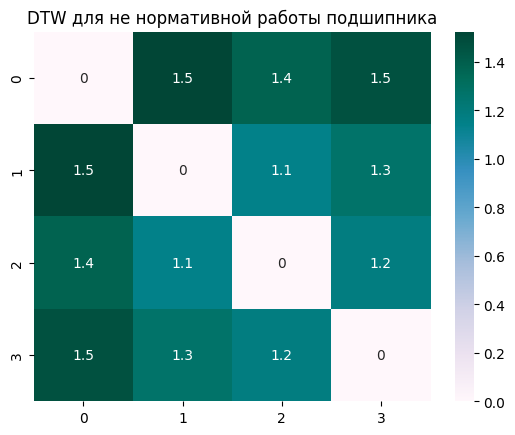

In [371]:
for i in range(1, 5):
  for j in range(1, 5):
    elem = dtw(df1["sensor" + str(i)].values, df1["sensor" + str(j)].values, keep_internals=True)
    dtw_matrix[i - 1, j - 1] = elem.normalizedDistance

sb.heatmap(dtw_matrix, cmap="PuBuGn", annot=True)
plt.title("DTW для не нормативной работы подшипника")
plt.show()

DTW для нормативной работы подшипника

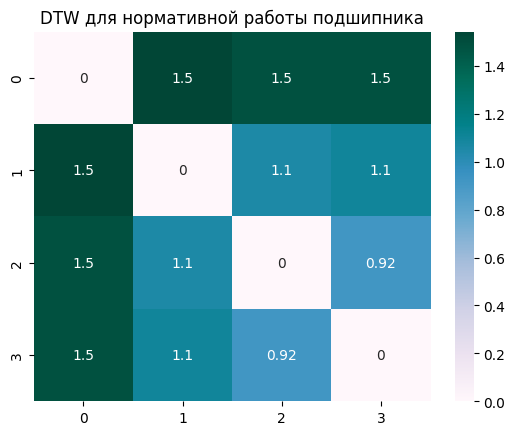

In [372]:
for i in range(1, 5):
  for j in range(1, 5):
    elem = dtw(df2["sensor" + str(i)].values, df2["sensor" + str(j)].values, keep_internals=True)
    dtw_matrix[i - 1, j - 1] = elem.normalizedDistance

sb.heatmap(dtw_matrix, cmap="PuBuGn", annot=True)
plt.title("DTW для нормативной работы подшипника")
plt.show()

DTW для всех сочетаний нормативных и не нормативных сигналов

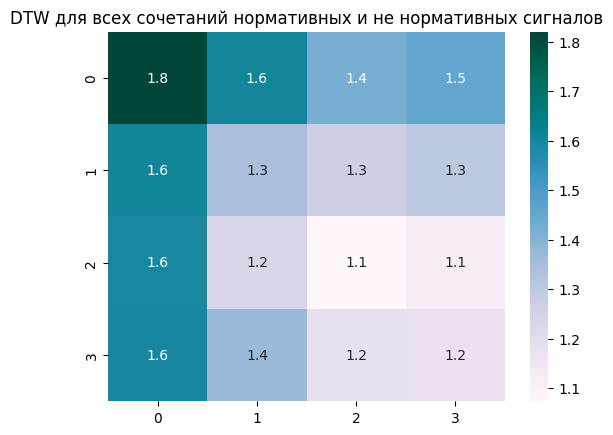

In [373]:
for i in range(1, 5):
  for j in range(1, 5):
    elem = dtw(df1["sensor" + str(i)].values, df2["sensor" + str(j)].values, keep_internals=True)
    dtw_matrix[i - 1, j - 1] = elem.normalizedDistance

sb.heatmap(dtw_matrix, cmap="PuBuGn", annot=True)
plt.title("DTW для всех сочетаний нормативных и не нормативных сигналов")
plt.show()

Спектральная плотность сигнала

In [374]:
from scipy import signal

Спектральная плотность сигнала не нормативной работы подшипника

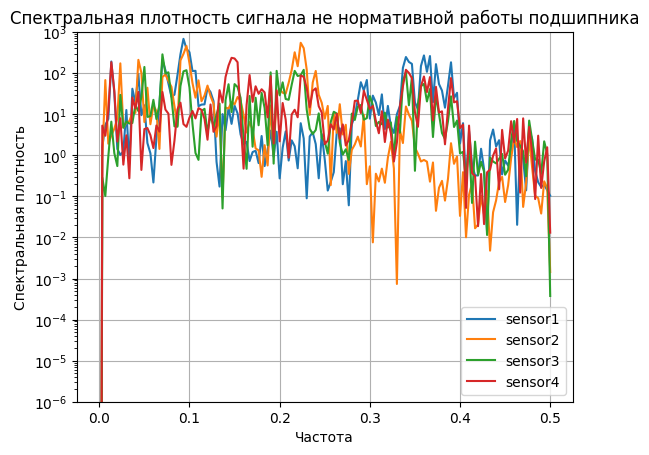

In [375]:
variables = list()

for i in range(1, 5):
  f, Pxx_den = signal.periodogram(df1["sensor" + str(i)].values)
  variables.append("sensor" + str(i))
  plt.semilogy(f, Pxx_den)

plt.xlabel("Частота")
plt.ylabel("Спектральная плотность")
plt.title("Спектральная плотность сигнала не нормативной работы подшипника")
plt.ylim([10 ** -6, 10 ** 3])
plt.legend(variables)
plt.grid(True)
plt.show()

Спектральная плотность сигнала нормативной работы подшипника

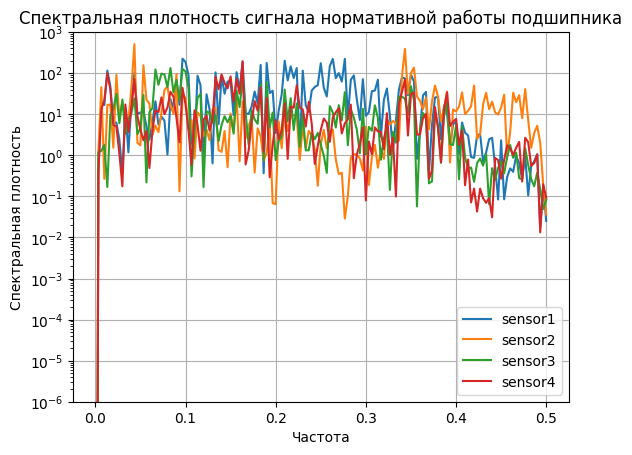

In [376]:
variables = list()

for i in range(1, 5):
  f, Pxx_den = signal.periodogram(df2["sensor" + str(i)].values)
  variables.append("sensor" + str(i))
  plt.semilogy(f, Pxx_den)

plt.xlabel("Частота")
plt.ylabel("Спектральная плотность")
plt.title("Спектральная плотность сигнала нормативной работы подшипника")
plt.ylim([10 ** -6, 10 ** 3])
plt.legend(variables)
plt.grid(True)
plt.show()

Разложение временных рядов на составляющие

In [377]:
from statsmodels.tsa.seasonal import seasonal_decompose

Разложение sensor1 для не нормативной работы подшипника

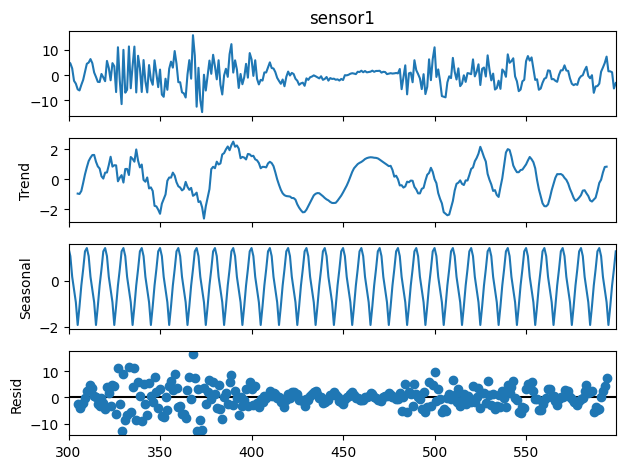

In [378]:
seasonal_decompose(df1.sensor1, period=10).plot().show()

Разложение sensor2 для не нормативной работы подшипника

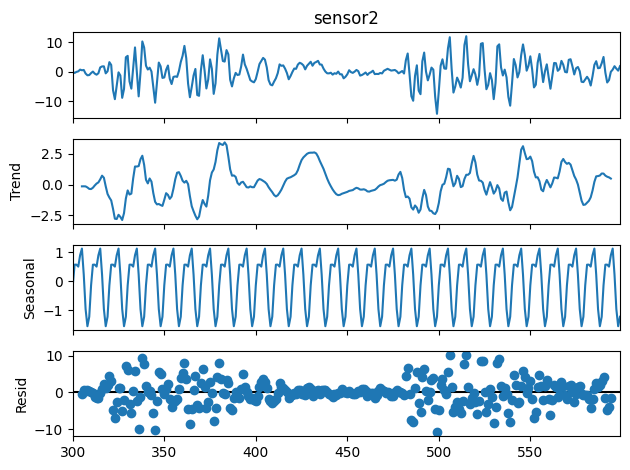

In [379]:
seasonal_decompose(df1.sensor2, period=10).plot().show()

Разложение sensor3 для не нормативной работы подшипника

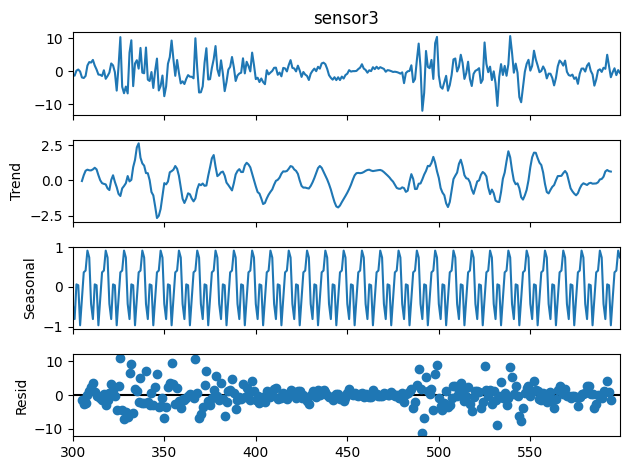

In [380]:
seasonal_decompose(df1.sensor3, period=10).plot().show()

Разложение sensor4 для не нормативной работы подшипника

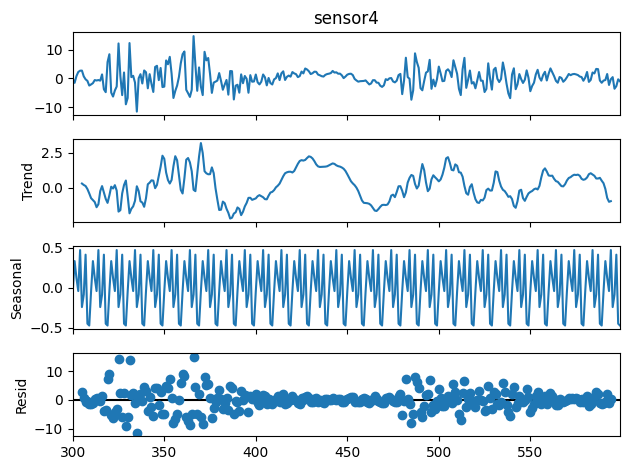

In [381]:
seasonal_decompose(df1.sensor4, period=10).plot().show()

Разложение sensor1 для нормативной работы подшипника

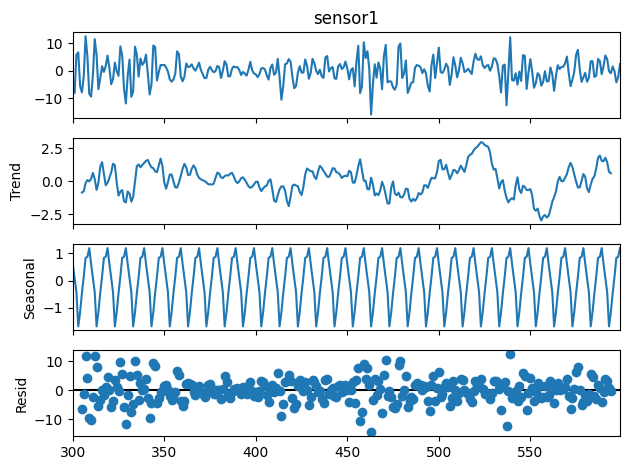

In [382]:
seasonal_decompose(df2.sensor1, period=10).plot().show()

Разложение sensor2 для нормативной работы подшипника

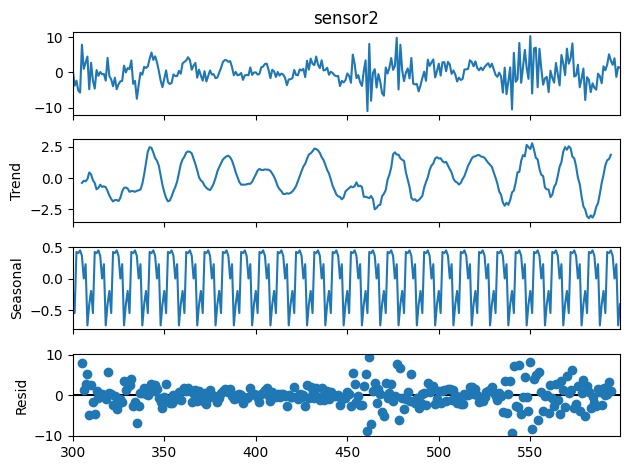

In [383]:
seasonal_decompose(df2.sensor2, period=10).plot().show()

Разложение sensor3 для нормативной работы подшипника

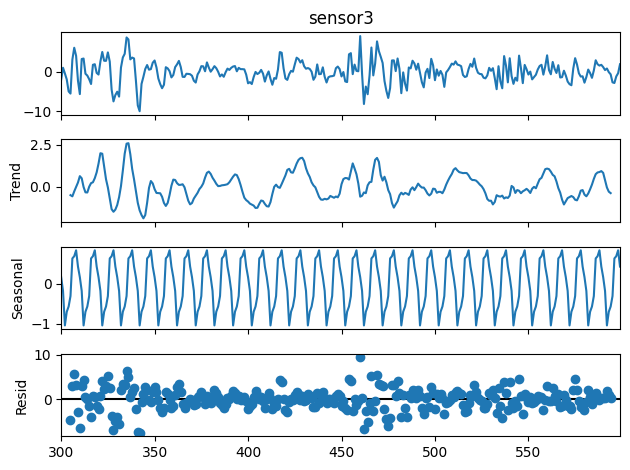

In [384]:
seasonal_decompose(df2.sensor3, period=10).plot().show()

Разложение sensor4 для нормативной работы подшипника

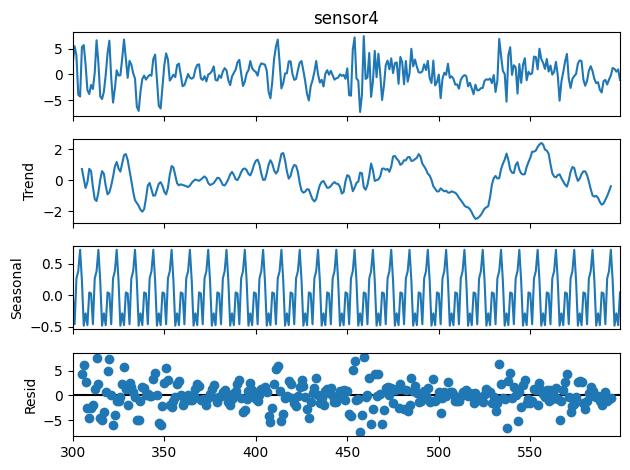

In [385]:
seasonal_decompose(df2.sensor4, period=10).plot().show()